In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
# Reading in data from the 50-50 readmit vs. nonreadmit dataset

df = pd.read_csv('dfd.csv')

Violinplots for top four important features:

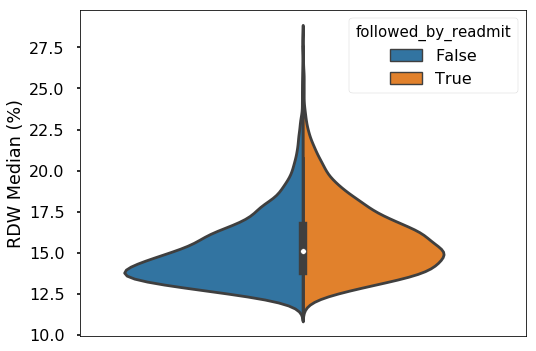

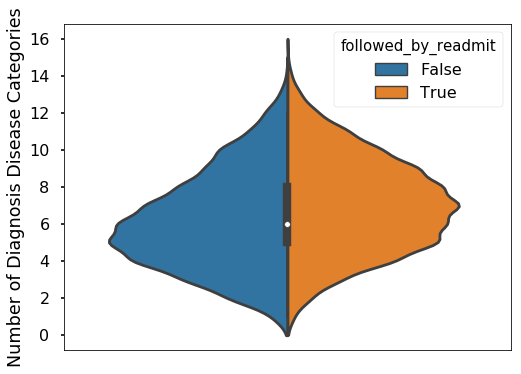

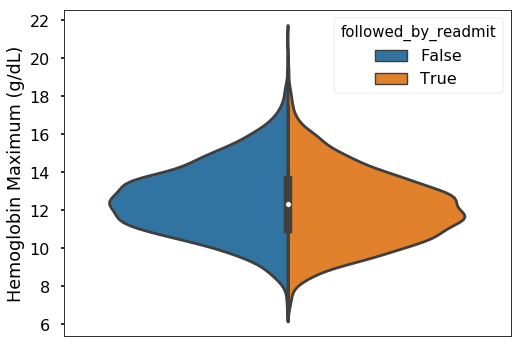

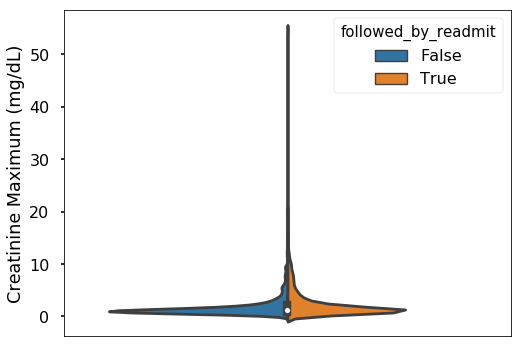

In [14]:
top5_name_unit = ['RDW Median (%)', 'Number of Diagnosis Disease Categories', 'Hemoglobin Maximum (g/dL)',
                    'Creatinine Maximum (mg/dL)']
df_rdw_melt = df.melt(id_vars = 'followed_by_readmit', value_vars='rdw_median',
                                 var_name='Measure', value_name=top5_name_unit[0])
df_numdiag_melt = df.melt(id_vars = 'followed_by_readmit', value_vars='No_of_Depart',
                                 var_name='Measure', value_name=top5_name_unit[1])
df_hemo_melt = df.melt(id_vars = 'followed_by_readmit', value_vars='hemoglobin_max',
                                 var_name='Measure', value_name=top5_name_unit[2])
df_creat_melt = df.melt(id_vars = 'followed_by_readmit', value_vars='creatinine_max',
                                 var_name='Measure', value_name=top5_name_unit[3])


df_list = [df_rdw_melt, df_numdiag_melt, df_hemo_melt, df_creat_melt]
with sns.plotting_context('poster'):
    for i in range(len(df_list)):
        plt.figure(figsize=(8,6))
        sns.violinplot(x='Measure', y=top5_name_unit[i], hue='followed_by_readmit', data=df_list[i], split=True)
        plt.xticks([])
        plt.xlabel('')
        plt.savefig(top5_name_unit[i][:10] + '_violin.png', bbox_inches='tight')

How about the distribution for is_readmit?

In [96]:
df_isreadmit = df.groupby('followed_by_readmit')['is_readmit'].value_counts().unstack(level=1)
df_isreadmit

is_readmit,False,True
followed_by_readmit,,
False,2892,154
True,2539,507


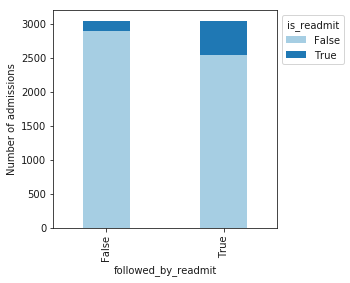

In [132]:
with sns.color_palette('Paired'):
    df_isreadmit.plot.bar(stacked=True, width=0.4, figsize=(4,4)).legend(title='is_readmit', bbox_to_anchor=[1,1])
    plt.ylabel('Number of admissions')
    plt.savefig('is_readmit_barplot.png', bbox_inches='tight')